# Photo Classifier: Model evaluation

## Imports

In [1]:
import random
import numpy as np
import pandas as pd
from collections import Counter

In [2]:
from file_io import load_pickle_file
from constants import MODEL_FILE_PATH
from image_transforms import image_transforms
from prediction import predict, calculate_accuracy
from plotting import visualize_prediction

In [3]:
import random
random.seed(42)

## Load model and data

In [4]:
model_data = load_pickle_file(MODEL_FILE_PATH)
model = model_data['model']
image_data = model_data['data']

## Model evaluation

### Accuracy

In [5]:
x = image_data.get_images('test')
y_true = image_data.get_classes('test')

In [6]:
y_pred, p = predict(x, model, image_transforms['test'])

In [7]:
calculate_accuracy(y_true, y_pred)

0.8571428571428571

In [8]:
test_data_labels = image_data.get_labels('test')
is_correct = (y_true==y_pred).tolist()
df_is_correct = pd.DataFrame(dict(label=test_data_labels,is_correct=is_correct))
accuracy_by_label = df_is_correct.groupby('label', as_index=False).mean()

In [9]:
training_data_labels = image_data.get_labels('training')
n_samples_per_class_in_training_data = dict(Counter(training_data_labels))
accuracy_by_label['n_train'] = accuracy_by_label['label'].apply(lambda x: n_samples_per_class_in_training_data[x])

In [10]:
accuracy_by_label.sort_values('is_correct', inplace=True)

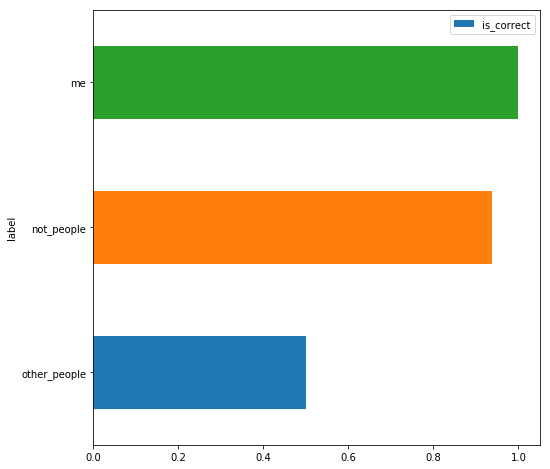

In [11]:
_ = accuracy_by_label.plot.barh(x='label', y='is_correct', figsize=(8,8))

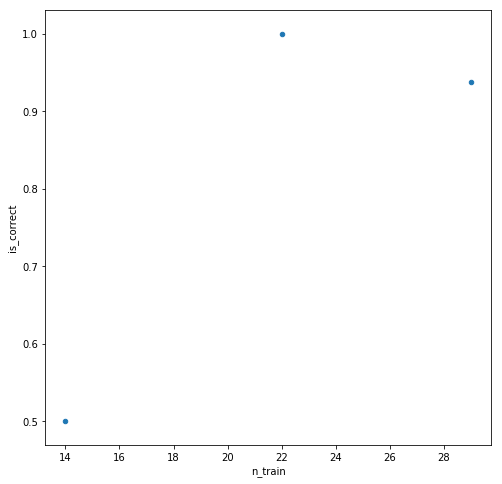

In [12]:
_ = accuracy_by_label.plot.scatter(x='n_train', y='is_correct', figsize=(8,8))

In [13]:
accuracy_by_label

,label,is_correct,n_train
2,other_people,0.5000,14
1,not_people,0.9375,29
0,me,1.0000,22


In [14]:
df_is_correct[df_is_correct.is_correct == False]

,label,is_correct
4,other_people,False
13,other_people,False
23,other_people,False
27,not_people,False


### Example predictions

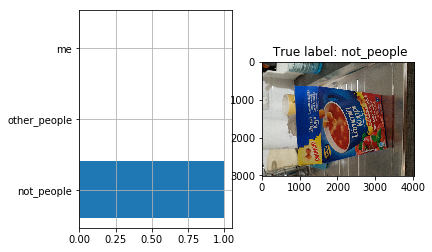

In [15]:
test_index = 0

image = image_data.get_image(test_index, 'test')
true_label = image_data.get_label(test_index, 'test')
probabilities = p[test_index]
i_sorted = np.argsort(probabilities)[::-1][:5]
prob = probabilities[i_sorted]
labels_predicted = image_data.convert_classes_to_labels(i_sorted)

visualize_prediction(image,
                     true_label, 
                     labels_predicted, 
                     prob)

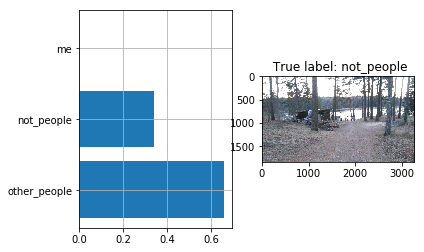

In [17]:
test_index = 27

image = image_data.get_image(test_index, 'test')
true_label = image_data.get_label(test_index, 'test')
probabilities = p[test_index]
i_sorted = np.argsort(probabilities)[::-1][:5]
prob = probabilities[i_sorted]
labels_predicted = image_data.convert_classes_to_labels(i_sorted)

visualize_prediction(image,
                     true_label, 
                     labels_predicted, 
                     prob)